In [1]:
%matplotlib inline
%pylab inline

import menpo.io as mio
from menpo.feature import fast_dsift, no_op, dsift, sparse_hog
from menpo.landmark import labeller, ibug_face_66
from menpo.visualize import visualize_images

from menpofit.aam import (
    AAMBuilder, PatchAAMBuilder, LinearAAMBuilder, LinearPatchAAMBuilder, PartsAAMBuilder,
    SupervisedDescentAAMFitter,
    ProjectOutNewton, ProjectOutGaussNewton)

from menpofit.visualize import visualize_aam, visualize_fitting_result

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Load training data

In [ ]:
training_images = []
for i in mio.import_images('/vol/atlas/databases/lfpw/trainset/',  
                           verbose=True, max_images=None):
    print i
    i.rescale_landmarks_to_diagonal_range(200)
    i = i.crop_to_landmarks_proportion(0.5)
    labeller(i, 'PTS', ibug_face_66)
    if i.n_channels == 3:
        i = i.as_greyscale(mode='average')
    training_images.append(i)

In [ ]:
visualize_images(training_images)

## Load test data

In [ ]:
test_images = []
for i in mio.import_images('/vol/atlas/databases/lfpw/testset/', 
                           verbose=True, max_images=None):    
    i.rescale_landmarks_to_diagonal_range(200)
    i.crop_to_landmarks_proportion_inplace(0.5)
    labeller(i, 'PTS', ibug_face_66)
    if i.n_channels == 3:
        i = i.as_greyscale(mode='average')
    test_images.append(i)

In [ ]:
visualize_images(test_images)

## Build Active Appearance Models

In [6]:
features = fast_dsift
diagonal = 200
scales = (1, .5)
scale_shapes = False
scale_features = True
max_shape_components= 25
max_appearance_components = None

patch_shape = (17, 17)

normalize_parts = no_op

#### AAM

In [7]:
# aam_builder = AAMBuilder(
#     features=features,
#     diagonal=diagonal, 
#     scales=scales, 
#     scale_shapes=scale_shapes,
#     scale_features=scale_features,
#     max_shape_components=max_shape_components,
#     max_appearance_components=max_appearance_components)

# aam = aam_builder.build(
#     training_images, 
#     group='ibug_face_66', 
#     verbose=True)

#### Patch based AAM

In [8]:
# patch_aam_builder = PatchAAMBuilder(
#     patch_shape=patch_shape,
#     features=features,
#     diagonal=diagonal, 
#     scales=scales, 
#     scale_shapes=scale_shapes,
#     scale_features=scale_features,
#     max_shape_components=max_shape_components,
#     max_appearance_components=max_appearance_components)

# patch_aam = patch_aam_builder.build(
#     training_images, 
#     group='ibug_face_66', 
#     verbose=True)

#### Linear AAM

In [9]:
# linear_aam_builder = LinearAAMBuilder(
#     features=features,
#     diagonal=diagonal, 
#     scales=scales, 
#     scale_shapes=scale_shapes,
#     scale_features=scale_features,
#     max_shape_components=max_shape_components,
#     max_appearance_components=max_appearance_components)

# linear_aam = linear_aam_builder.build(
#     training_images, 
#     group='ibug_face_66', 
#     verbose=True)

#### Linear Patch based AAM

In [10]:
# linear_patch_aam_builder = LinearPatchAAMBuilder(
#     patch_shape=patch_shape,
#     features=features,
#     diagonal=diagonal, 
#     scales=scales, 
#     scale_shapes=scale_shapes,
#     scale_features=scale_features,
#     max_shape_components=max_shape_components,
#     max_appearance_components=max_appearance_components)

# linear_patch_aam = linear_patch_aam_builder.build(
#     training_images, 
#     group='ibug_face_66', 
#     verbose=True)

#### Parts based AAM

In [11]:
parts_aam_builder = PartsAAMBuilder(
    patch_shape=patch_shape, 
    features=features,
    normalize_parts=normalize_parts,
    diagonal=diagonal, 
    scales=scales, 
    scale_shapes=scale_shapes,
    scale_features=scale_features,
    max_shape_components=max_shape_components,
    max_appearance_components=max_appearance_components)

parts_aam = parts_aam_builder.build(
    training_images, 
    group='ibug_face_66', 
    verbose=True)

- Building models
  - Level 0: Done
  - Level 1: Done


## Fit Active Appearance Models

In [32]:
sd_algorithm_cls = ProjectOutGaussNewton
n_shape = [5, 15]
n_appearance = [50, 100]
n_perturbations = 10
noise_std = 0.05
sampling_step = [8, 8]

max_iters = [5, 3]
gamma = 1000000
psi = 1000

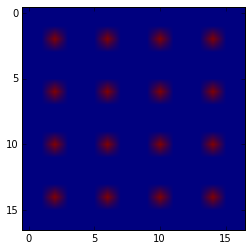

In [33]:
sampling_mask = parts_mask = np.require(np.zeros(patch_shape, dtype=np.bool))
sampling_mask[2::4, 2::4] = True
imshow(sampling_mask)

sampling_masks = [sampling_mask]

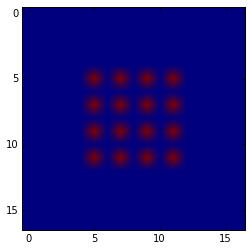

In [34]:
sampling_mask = parts_mask = np.require(np.zeros(patch_shape, dtype=np.bool))
sampling_mask[5:12:2, 5:12:2] = True
imshow(sampling_mask)
sampling_masks.append(sampling_mask)

#### AAM Fitter

In [35]:
# aam_fitter = CRAAMFitter(
#     aam, 
#     cr_algorithm_cls=cr_algorithm_cls, 
#     n_shape=n_shape, 
#     n_appearance=n_appearance,
#     n_perturbations=n_perturbations,
#     max_iters=max_iters,
#     sampling=sampling_step)

# aam_fitter.train(
#     training_images, 
#     group='ibug_face_66', 
#     gamma=gamma,
#     verbose=True)

#### Patch based AAM Fitter

In [36]:
# patch_aam_fitter = CRAAMFitter(
#     patch_aam, 
#     cr_algorithm_cls=cr_algorithm_cls, 
#     n_shape=n_shape, 
#     n_appearance=n_appearance,
#     n_perturbations=n_perturbations,
#     max_iters=max_iters,
#     sampling=sampling_step)

# patch_aam_fitter.train(
#     training_images, 
#     group='ibug_face_66', 
#     gamma=gamma,
#     verbose=True)

#### Linear AAM Fitter

In [37]:
# linear_aam_fitter = CRAAMFitter(
#     linear_aam, 
#     cr_algorithm_cls=cr_algorithm_cls, 
#     n_shape=n_shape, 
#     n_appearance=n_appearance,
#     n_perturbations=n_perturbations,
#     max_iters=max_iters,
#     sampling=sampling_step)

# linear_aam_fitter.train(
#     training_images, 
#     group='ibug_face_66', 
#     gamma=gamma,
#     verbose=True)

#### Linear Patch based AAM Fitter

In [38]:
# linear_patch_aam_fitter = CRAAMFitter(
#     linear_patch_aam, 
#     cr_algorithm_cls=cr_algorithm_cls, 
#     n_shape=n_shape, 
#     n_appearance=n_appearance,
#     n_perturbations=n_perturbations,
#     max_iters=max_iters,
#     sampling=sampling_step)

# linear_patch_aam_fitter.train(
#     training_images, 
#     group='ibug_face_66', 
#     gamma=gamma,
#     verbose=True)

#### Parts based AAM Fitter

In [39]:
parts_aam_fitter = SupervisedDescentAAMFitter(
    parts_aam, 
    sd_algorithm_cls=sd_algorithm_cls, 
    n_shape=n_shape, 
    n_appearance=n_appearance,
    n_perturbations=n_perturbations,
    noise_std=noise_std,
    max_iters=max_iters,
    sampling=sampling_masks)

parts_aam_fitter.train(
    training_images, 
    group='ibug_face_66', 
    gamma=gamma,
    #psi=psi,
    dtype=np.float32,
    verbose=True)

- Normalizing images size: Done
- Regression RMSE is 123.79450.
- Regression RMSE is 128.50283.
- Regression RMSE is 131.30082.
- Regression RMSE is 129.67557.
- Regression RMSE is 130.14450.
- Regression RMSE is 314.12876.
- Regression RMSE is 607.50357.
- Regression RMSE is 1421.53067.


#### Fitting loop

In [25]:
np.random.seed(seed=0)

fitters = [#aam_fitter,
           #patch_aam_fitter,
           #linear_aam_fitter,
           #linear_patch_aam_fitter,
           parts_aam_fitter]

fitters_results =  [[]]

for j, i in enumerate(test_images):
    
    gt_s = i.landmarks['ibug_face_66'].lms
    s = fitters[0].noisy_shape_from_shape(gt_s, noise_std=0.05)

    for k, fitter in enumerate(fitters):
        
        fr = fitter.fit(i, s, gt_shape=gt_s)
        fr.downscale = 0.5   
        fitters_results[k].append(fr)
    
        print 'Image: ', j
        print fr

Image:  0
Initial error: 0.1221
Final error: 0.0208
Image:  1
Initial error: 0.0920
Final error: 0.0246
Image:  2
Initial error: 0.0853
Final error: 0.0218
Image:  3
Initial error: 0.0572
Final error: 0.0343
Image:  4
Initial error: 0.0876
Final error: 0.0300
Image:  5
Initial error: 0.0964
Final error: 0.0289
Image:  6
Initial error: 0.0804
Final error: 0.0233
Image:  7
Initial error: 0.1044
Final error: 0.0313
Image:  8
Initial error: 0.0599
Final error: 0.0350
Image:  9
Initial error: 0.0358
Final error: 0.0280
Image:  10
Initial error: 0.1644
Final error: 0.0316
Image:  11
Initial error: 0.1381
Final error: 0.0331
Image:  12
Initial error: 0.1565
Final error: 0.0195
Image:  13
Initial error: 0.0613
Final error: 0.0243
Image:  14
Initial error: 0.1215
Final error: 0.0387
Image:  15
Initial error: 0.1707
Final error: 0.0327
Image:  16
Initial error: 0.0962
Final error: 0.0270
Image:  17
Initial error: 0.1586
Final error: 0.0334
Image:  18
Initial error: 0.0911
Final error: 0.0224
Ima

## Visualize Results

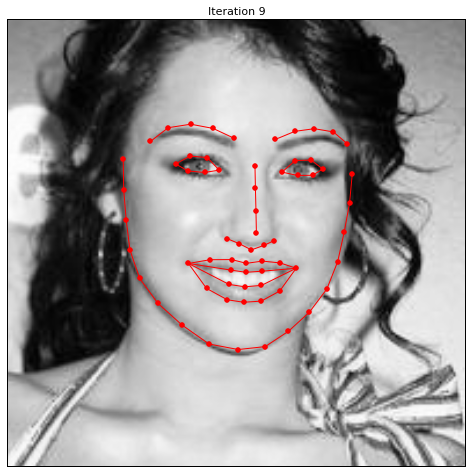

In [26]:
visualize_fitting_result(fitters_results[0])